<a href="https://colab.research.google.com/github/SongheeJo/aiffelthon/blob/main/preprocessed_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install tensorflow-io[tensorflow]

     |████████████████████████████████| 25.9 MB 1.5 MB/s 
     |████████████████████████████████| 2.4 MB 59.2 MB/s 
     |████████████████████████████████| 511.7 MB 4.1 kB/s 
     |████████████████████████████████| 1.6 MB 48.3 MB/s 
     |████████████████████████████████| 438 kB 65.6 MB/s 
     |████████████████████████████████| 5.8 MB 54.5 MB/s 
  Attempting uninstall: tensorflow-io-gcs-filesystem
    Found existing installation: tensorflow-io-gcs-filesystem 0.25.0
    Uninstalling tensorflow-io-gcs-filesystem-0.25.0:
      Successfully uninstalled tensorflow-io-gcs-filesystem-0.25.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: kera

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import librosa.display
import librosa as lb
import soundfile as sf

import os
import sys
print(sys.version)

3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]


In [4]:
'''
import tensorflow_io as tfio
from google.colab import drive
from os.path import join
ROOT = "/content/drive"
print(ROOT)
drive.mount(ROOT)
'''

'\nimport tensorflow_io as tfio\nfrom google.colab import drive\nfrom os.path import join\nROOT = "/content/drive"\nprint(ROOT)\ndrive.mount(ROOT)\n'

# 1. Load data

## (1) 라벨

In [5]:
sheet_url="https://docs.google.com/spreadsheets/d/1ughHksz5KWOlsL1fJIm4Qqj6mAvygkdz_TzTV-2c2wM/edit#gid=1070722979"
url_1 = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df = pd.read_csv(url_1)
df.head()

,Unnamed: 0,start,end,pid,mode,filename,disease,crack_wheeze
0,0,1.862,5.718,160,mc,160_1b3_Al_mc_AKGC417L_0.wav,COPD,2
1,1,5.718,9.725,160,mc,160_1b3_Al_mc_AKGC417L_1.wav,COPD,3
2,2,9.725,13.614,160,mc,160_1b3_Al_mc_AKGC417L_2.wav,COPD,2
3,3,13.614,17.671,160,mc,160_1b3_Al_mc_AKGC417L_3.wav,COPD,2
4,4,17.671,19.541,160,mc,160_1b3_Al_mc_AKGC417L_4.wav,COPD,0


In [6]:
df.shape

(6898, 8)

## (2) 사운드 파일
6초로 잘라서 가져오기

In [7]:
data_no_pad = '/content/drive/MyDrive/processed_audio_files_no_pad/'

# 2. Pre-processing

In [8]:
re_sampleRate = 4000

#7초로 패딩하고 싶을 때 함수입니다
def zero_padding(pureSample, reqLen = 7 * re_sampleRate): 
  padded = lb.util.pad_center(pureSample, reqLen)
  return padded

zero_padded_7sec = [] #시간에 따라 이름 바꿔주세요

for index,row in df.iterrows():
  maxLen=7 #바꾸고 싶은 주기 5,6,7로 값 바꾸기
  start=row['start']
  end=row['end']
  filename=row['filename']
  
  audio_file_loc=data_no_pad + filename
  data_preprocessed, _ =lb.load(audio_file_loc, sr=re_sampleRate, mono=True) # mono로 불러오기??  # 인자로 리샘플 가능

  #If len > maxLen , change it to maxLen
  if end-start>maxLen:
      end=start+maxLen
      data_preprocessed = data_preprocessed[int(start * re_sampleRate) : int(end * re_sampleRate)]

  #zero_pad = zero_padding(processed_sample)
  zero_padded_7sec.append(zero_padding(data_preprocessed, reqLen = 7 * re_sampleRate)) #바꾸고 싶은 주기 5,6,7로 reqLen 값 바꾸기

#data_preprocessed = lb.resample(audioArr, sampleRate, re_sampleRate)

In [9]:
len(zero_padded_7sec) # 잘 되었는지 확인

6898

In [10]:
np.save(data_no_pad + 'zero_padded_7sec.npy',zero_padded_7sec) #패딩할 때 오래 걸리니 넘파이 파일로 저장해줍니다, 시간에 따라 이름 바꿔주세요

In [11]:
zero_padded_7sec

[array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0.,

In [12]:
print(type(zero_padded_7sec))

<class 'list'>


In [13]:
zero_padded_7sec = np.array(zero_padded_7sec)

# 3. Train_val_test_split

## (1) Handling Class Imbalance

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

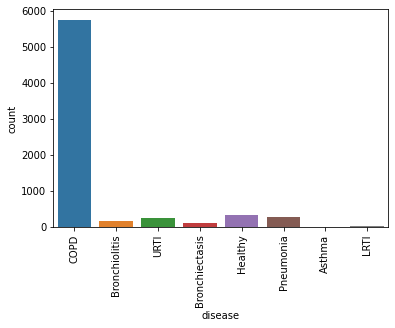

In [14]:
# 데이터셋이 불균형하게 분포되어있는가를 확인하기 위해 클래스별로 데이터 개수를 세는 막대그래프 그리기
sns.countplot(df.disease)    # 빈도그래프 - 각 범주에 속하는 데이터의 개수를 막대그래프로 나타내기
plt.xticks(rotation=90)    # x축 눈금 표시

## (2) train-val-test split
데이터 포인트를 랜덤으로 섞은 뒤 데이터셋을 훈련세트와 검증세트로 나눔
-> overfitting을 방지

In [15]:
# train, val = 75:25
from sklearn.model_selection import train_test_split    # 이 함수의 반환값은 모두 Numpy 배열
Xtrain,Xval,ytrain,yval=train_test_split(df,df.disease,random_state=42,test_size=0.25) 
# stratify : 비율맞추기(label의 클래스 분포를 균등하게 배분) // crackle/whizzle에서 의미가 있을 듯

In [16]:
Xtrain.crack_wheeze.value_counts()/Xtrain.shape[0]

0    0.525614
1    0.273342
2    0.129712
3    0.071332
Name: crack_wheeze, dtype: float64

In [17]:
Xtrain.shape,Xval.shape

((5173, 8), (1725, 8))

In [18]:
Xtrain_2,Xval_2,ytrain_2,yval_2=train_test_split(df,df.crack_wheeze,stratify=df.disease,random_state=42,test_size=0.25)
# stratify : 비율맞추기(label의 클래스 분포를 균등하게 배분) // crackle/whizzle에서 의미가 있을 듯

In [19]:
Xtrain_2.crack_wheeze.value_counts()/Xtrain_2.shape[0]

0    0.524261
1    0.274696
2    0.130485
3    0.070559
Name: crack_wheeze, dtype: float64

In [20]:
Xtrain_2.shape,Xval_2.shape

((5173, 8), (1725, 8))

In [21]:
print(Xtrain)

      Unnamed: 0   start     end  pid mode                      filename  \
4538        4538  10.779  14.279  123   sc  123_1b1_Al_sc_Meditron_4.wav   
3758        3758  18.887  19.792  107   mc  107_3p2_Pl_mc_AKGC417L_8.wav   
2271        2271   0.411   2.351  203   mc  203_1p2_Ar_mc_AKGC417L_0.wav   
947          947   0.048   2.130  176   mc  176_1b3_Ll_mc_AKGC417L_0.wav   
877          877   7.638  11.427  174   mc  174_1p3_Ll_mc_AKGC417L_2.wav   
...          ...     ...     ...  ...  ...                           ...   
3772        3772   8.970  11.542  107   mc  107_2b5_Pr_mc_AKGC417L_4.wav   
5191        5191   1.066   3.554  133   mc  133_2p4_Ar_mc_AKGC417L_0.wav   
5226        5226   7.375   9.946  133   mc  133_2p3_Tc_mc_AKGC417L_3.wav   
5390        5390   4.864   6.993  135   mc  135_2b3_Pl_mc_LittC2SE_2.wav   
860          860   0.326   4.282  174   mc  174_1p3_Tc_mc_AKGC417L_0.wav   

        disease  crack_wheeze  
4538    Healthy             0  
3758       COPD        

In [22]:
len(Xtrain)

5173

In [23]:
len(Xval)

1725

In [24]:
len(ytrain)

5173

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

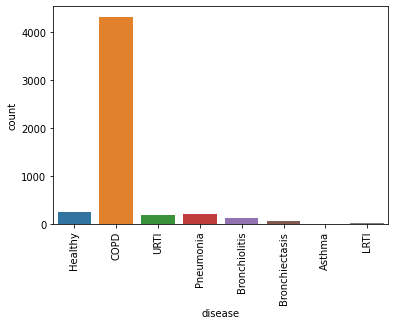

In [25]:
sns.countplot(ytrain)      # 빈도그래프 - 각 범주에 속하는 데이터의 개수를 막대그래프로 나타내기
plt.xticks(rotation=90)    # x축 눈금 표시

In [26]:
# LabelEncoder - object인 레이블(정답)의 자료형을 모델에 넣기 위해 숫자로 변환
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ytrain_2=le.fit_transform(ytrain_2)
yval_2=le.transform(yval_2)

# 4. Augmentation

In [27]:
'''
#참고용 ms코드
#**********************DATA AUGMENTAION***************************
#Creates a copy of each time slice, but stretches or contracts it by a random amount
def gen_augmented(original, sample_rate):
	# list of augmentors available from the nlpaug library
	augment_list = [
	#naa.CropAug(sampling_rate=sample_rate)
	naa.NoiseAug(),
	naa.SpeedAug(),
	naa.LoudnessAug(factor=(0.5, 2)),
	naa.VtlpAug(sampling_rate=sample_rate, zone=(0.0, 1.0)),
	naa.PitchAug(sampling_rate=sample_rate, factor=(-1,3))
	]
	# sample augmentation randomly
	aug_idx = random.randint(0, len(augment_list)-1)
	augmented_data = augment_list[aug_idx].augment(original)
	return augmented_data
'''

'\n#참고용 ms코드\n#**********************DATA AUGMENTAION***************************\n#Creates a copy of each time slice, but stretches or contracts it by a random amount\ndef gen_augmented(original, sample_rate):\n\t# list of augmentors available from the nlpaug library\n\taugment_list = [\n\t#naa.CropAug(sampling_rate=sample_rate)\n\tnaa.NoiseAug(),\n\tnaa.SpeedAug(),\n\tnaa.LoudnessAug(factor=(0.5, 2)),\n\tnaa.VtlpAug(sampling_rate=sample_rate, zone=(0.0, 1.0)),\n\tnaa.PitchAug(sampling_rate=sample_rate, factor=(-1,3))\n\t]\n\t# sample augmentation randomly\n\taug_idx = random.randint(0, len(augment_list)-1)\n\taugmented_data = augment_list[aug_idx].augment(original)\n\treturn augmented_data\n'

## nlpaug의 Audio Augmenter

In [28]:
# speed variation
!pip install nlpaug
import nlpaug.augmenter.audio as naa
from nlpaug.util.audio.visualizer import AudioVisualizer

aug = naa.speed.SpeedAug(zone=(0.2, 0.8), coverage=1.0, factor=(0.5, 2), name='Speed_Aug', verbose=0, stateless=True) # zone에 적용되는  coverage는 강도인건가?
augmented_data = aug.augment(Xtrain_2) # 훈련 데이터 입력

# random shifting
naa.shift.ShiftAug(re_sampleRate, duration=3, direction='random', shift_direction='random', name='Shift_Aug', verbose=0, stateless=True)
# direction left
naa.shift.ShiftAug(re_sampleRate, duration=3, direction='left', shift_direction='random', name='Shift_Aug_2', verbose=0, stateless=True)
# direction right
naa.shift.ShiftAug(re_sampleRate, duration=3, direction='right', shift_direction='random', name='Shift_Aug_3', verbose=0, stateless=True)

# mask
naa.pitch.PitchAug(re_sampleRate, zone=(0.2, 0.8), coverage=1.0, duration=None, factor=(-10, 10), name='Pitch_Aug', verbose=0, stateless=True)
augmented_data = aug.augment(data)
naa.mask.MaskAug(sampling_rate=re_sampleRate, zone=(0.2, 0.8), coverage=1.0, duration=None, mask_with_noise=True, name='Mask_Aug', verbose=0, stateless=True)
augmented_data = aug.augment(data)

# mask normalization?
aug = naa.NormalizeAug(method='standard', zone=(0.2, 0.8), coverage=0.3, name='Normalize_Aug', verbose=0, stateless=True) # standard normalization
augmented_data = aug.augment(data)

# weighted random sampler to sample mini-batches uniformly from each class
# Randomly weighted CNNs for (music) audio classification


'''
#찍어보자!

librosa_display.waveplot(df, sr=re_sampleRate, alpha=0.5)
librosa_display.waveplot(augmented_data, sr=re_sampleRate, color='r', alpha=0.25)

plt.tight_layout()
plt.show()

'''

     |████████████████████████████████| 410 kB 14.2 MB/s 


ParameterError: ignored

In [ ]:
# audio = tfio.audio.AudioIOTensor('gs://cloud-samples-tests/speech/brooklyn.flac')

In [ ]:
# print(audio)

In [ ]:
'''
# masking
!pip install tensorflow-io[tensorflow] # 이 버전에 맞는 텐서플로-io 설치
import tensorflow as tf 
import tensorflow_io as tfio
audio = tfio.audio.AudioIOTensor(data_preprocessed, dtype=None)

print(audio)
'''

# 5. Feature Extraction
리브로사의 feture extraction 방식을 써보자! + 1-by-1으로 각각의 성능을 확인하자!

In [ ]:
df

In [ ]:
Xtrain.tail

In [ ]:
Xval

In [ ]:
ytrain

In [ ]:
yval

## (2) 추출

In [ ]:
re_sampleRate = 4000

#이 값들 조정
frame_length = 0.025
frame_stride = 0.010

input_nfft = int(round(re_sampleRate*frame_length))
input_stride = int(round(re_sampleRate*frame_stride))

def Mel_S(padded_wav, frame_length = 0.025, frame_stride = 0.010): #제로패딩한 데이터 하나 씩 넣자
    # mel-spectrogram
    # y, sr = librosa.load(wav_file, sr=16000)

    # wav_length = len(y)/sr
    input_nfft = int(round(re_sampleRate*frame_length))
    input_stride = int(round(re_sampleRate*frame_stride))

    mel = librosa.feature.melspectrogram(y=padded_wav, n_mels=40, n_fft=input_nfft, hop_length=input_stride)#nfft는 푸리에 변환 개수
    #y는 np.ndarray의 audio time-series
    #print("Wav length: {}, Mel_S shape:{}".format(len(padded_wav)/sr,np.shape(mel)))
    
    return mel

In [ ]:
zero_padded_7sec

In [ ]:
loaded_padded_7sec_array = np.load('/content/drive/MyDrive/processed_audio_files_no_pad/zero_padded_7sec.npy')

In [ ]:
print(loaded_padded_7sec_array)

In [ ]:
print(type(loaded_padded_7sec_array))

In [ ]:
print(type(zero_padded_7sec))

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
Xtrain_2,Xval_2,ytrain_2,yval_2=train_test_split(loaded_padded_7sec_array,df.disease,stratify=df.disease,random_state=42,test_size=0.2)

In [ ]:
#train과 val의 mel을 각각 뽑습니다
Mel_spectrogram = []

for zero_padded_7sec in Xtrain_2: # for문 이해 + 인자 확인
  Mel_spectrogram.append(Mel_S(zero_padded_7sec))

Mel_spectrogram_val = []

for zero_padded_7sec in Xval_2:
  Mel_spectrogram_val.append(Mel_S(zero_padded_7sec))

In [ ]:
#이것도 혹시 모르니 저장해 둡니다 - 넘파이 저장하는 편이 속도가 빠른지, 아닌것인지?
np.save(data_no_pad + 'Mel_spectrogram.npy',Mel_spectrogram)
np.save(data_no_pad + 'Mel_spectrogram_val.npy',Mel_spectrogram_val)

In [ ]:
#랜덤으로 몇개 뽑아 봅니다. 검은 줄이 계속 가 있습니다ㅜ butterworth filter를 안해서 그런 걸까요? 아님 sr=4000은 너무 낮아서?
randFiles = [10 * x for x in range(1,5)]

for i,audioFile in enumerate(randFiles):
  
  plt.figure(figsize=(10, 4))
  plt.title('Mel-Spectrogram') 
  librosa.display.specshow(
      librosa.power_to_db(Mel_spectrogram[audioFile], ref=np.max), y_axis='mel', sr=re_sampleRate, hop_length=input_stride, x_axis='time')
  plt.colorbar(format='%+2.0f dB')
  
  plt.tight_layout()
  plt.savefig('Mel-Spectrogram example.png')
  plt.show()

In [ ]:
mSpec_train=np.array(Mel_spectrogram)
mSpec_val = np.array(Mel_spectrogram_val)

In [ ]:
mSpec_train.shape, mSpec_val.shape

In [ ]:
ytrain_2.shape, yval_2.shape

# 6. model

In [ ]:
#주석 부분은 skip layer 시도했다가 잘 안돼서 주석처리한 것입니다.

mSpec_input=keras.layers.Input(shape=(40,701,1),name="mSpecInput") #(128,259,1)(40, 701, 1)
x=keras.layers.Conv2D(32,5,strides=(2,3),padding='same')(mSpec_input) # (64, 87, 32) (20, 233, 32)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x) # (32, 43, 32) (10, 116,32)

#skip_x = x # (32, 43, 32)
#skip_x = keras.layers.Conv2D(96,3,strides=(2,4),padding='same')(skip_x) #(8, 11, 96) (5, 29, 96)####

x=keras.layers.Conv2D(64,3,strides=(1,2),padding='same')(x) #(16, 22, 64) (10, 58, 64)###
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x) #(8, 11, 64) (5, 29, 64)

x=keras.layers.Conv2D(96,2,padding='same')(x) #(8, 11, 96) (5, 29, 96)#####
#x = keras.layers.Add()([x,skip_x])
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x) #(4, 5, 96) (3, 14, 96)

x=keras.layers.Conv2D(128,2,padding='same')(x) #(4, 5, 128)(3, 14, 128)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.GlobalMaxPooling2D()(x) #(, 128) (, 128)

x=keras.layers.Dropout(0.2)(x)
x=keras.layers.Dense(50,activation='relu')(x)
x=keras.layers.Dropout(0.3)(x)
x=keras.layers.Dense(25,activation='relu')(x)
x=keras.layers.Dropout(0.3)(x)
output=keras.layers.Dense(8,activation='softmax')(x)


mSpec_model=keras.Model(mSpec_input, output, name="mSpecModel")

In [ ]:
mSpec_model.summary()

## 학습

In [ ]:
# LabelEncoder - object인 레이블(정답)의 자료형을 모델에 넣기 위해 숫자로 변환
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ytrain_2=le.fit_transform(ytrain_2)
yval_2=le.transform(yval_2)

In [ ]:
accuracy='sparse_categorical_accuracy'
sparseLoss=keras.losses.SparseCategoricalCrossentropy()

from keras import backend as K
K.clear_session()
mSpec_model.compile(optimizer='nadam', loss=sparseLoss, metrics=[accuracy])
K.set_value(mSpec_model.optimizer.learning_rate, 0.001)

In [ ]:
file_name = '/content/drive/MyDrive/aiffel/aiffelthon/model/checkpoint-only-zero-001.h5'
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=3, min_lr=1e-12,mode='min'), #미분하다 막히면 lr 변경해줌
    tf.keras.callbacks.ModelCheckpoint(file_name, monitor='val_loss', verbose=0, save_best_only=True,)
]

In [ ]:
ytrain_2

In [ ]:
yval_2

In [ ]:
mSpec_train=np.array(mSpec_train)

In [ ]:
mSpec_val=np.array(mSpec_val)

In [ ]:
mSpec_val

In [ ]:
history=mSpec_model.fit(
    mSpec_train, # fit 할 때 ndarray > tensor로 바꾸는 느낌?
    ytrain_2,
    validation_data=(mSpec_val,yval_2),
    epochs=100,verbose=1,
    callbacks=my_callbacks
)

In [ ]:
y_pred = mSpec_model.predict(mSpec_val)

# 7. Evaluate

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix(np.argmax(y_pred, axis = 1), yval_2)

In [ ]:
from sklearn.metrics import classification_report

target_names=['URTI', 'Healthy', 'Asthma', 'COPD', 'LRTI', 'Bronchiectasis', 'Pheumonia', 'Bronchiolitis']
clf_report = classification_report(yval_2, np.argmax(y_pred, axis = 1), target_names=target_names, output_dict=True)
print(classification_report(yval_2, np.argmax(y_pred, axis = 1), target_names=target_names))